<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Data collection
dt = pd.read_csv('/content/delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt.shape # checking the dataframe shape

(21, 2)

In [7]:
dt.dtypes # data types

Delivery Time    float64
Sorting Time       int64
dtype: object

In [16]:
dt.isnull().sum()  # Cheacking for the missing values

Delivery Time    0
Sorting Time     0
dtype: int64

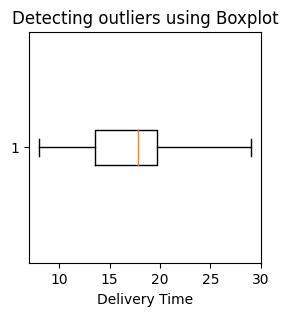

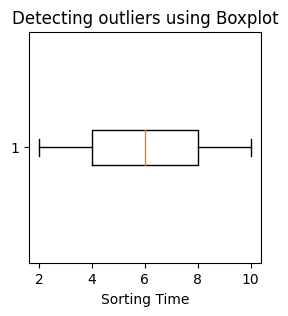

In [59]:
# Checking for any outliers

import matplotlib.pyplot as plt

for i in dict(dt.dtypes):
 if dict(dt.dtypes)[i] == 'int64' or dict(dt.dtypes)[i] ==  'float64':
  plt.figure(figsize =(3,3))
  plt.boxplot(dt[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

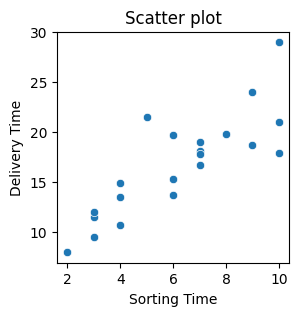

In [56]:
# Data Visualization

import seaborn as sns

plt.figure(figsize =(3,3))
sns.scatterplot(x = dt['Sorting Time'], y= dt['Delivery Time'], data = dt)
plt.title('Scatter plot')
plt.show()

In [106]:
# Data Summary

dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [107]:
# lets assign a variables to the columns

x = dt[['Sorting Time']]
y = dt[['Delivery Time']]

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y , test_size= 0.2)


In [108]:
x_train.shape

(16, 1)

In [109]:
x_test.shape # 20% of the sorting time column from the main dataframe

(5, 1)

In [110]:
from sklearn.linear_model import LinearRegression  # importing the linear regression model
reg= LinearRegression()   # Assigning the model to a variable reg
reg.fit(x_train,y_train) # training the model


LinearRegression()

In [111]:
# Now our model is ready to test

reg.predict([[4]]) # gave a random sorting time 4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13.38978261]])

In [112]:
# Checking for the test variables

y_pred =reg.predict(x_test)
y_pred

array([[10.32065217],
       [21.0626087 ],
       [17.99347826],
       [13.38978261],
       [16.45891304]])

Text(0.5, 1.0, 'Sorting Time - Delivery Time Data')

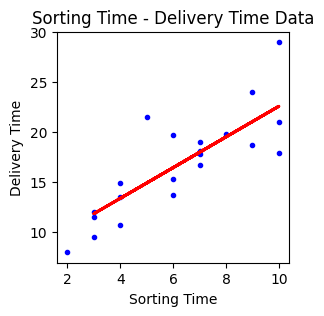

In [127]:
# Lets see the best fit line

plt.figure(figsize =(3,3))
plt.scatter(dt[['Sorting Time']], dt[['Delivery Time']], color = 'blue', marker = '.')
plt.plot(x_train, reg.predict(x_train), color = 'red',linewidth= 2)
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')
plt.title('Sorting Time - Delivery Time Data')

In [146]:
# Performance of the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_train,reg.predict(x_train))
mset = mean_squared_error(y_test,reg.predict(x_test))
mae = mean_absolute_error(y_train, reg.predict(x_train))
maet = mean_absolute_error(y_test, reg.predict(x_test))
r2 = r2_score(y_test,reg.predict(x_test))
r2t = r2_score(y_train,reg.predict(x_train))


print("Mean squared Error for train: ", mse)
print("Mean squared Error for test: ", mset)
print('Mean Absolute Error for train: ', mae)
print('Mean Absolute Error for test: ', maet)
print('R - square for test: ', r2)
print('R - square for train: ', r2t)

Mean squared Error for train:  9.243428532608696
Mean squared Error for test:  3.4981710680529288
Mean Absolute Error for train:  2.2474456521739126
Mean Absolute Error for test:  1.6041304347826089
R - square for test:  0.8685146038606807
R - square for train:  0.6088321343100307


In [49]:
### Linear Regression for salary hike


ds = pd.read_csv('/content/Salary_Data.csv')
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [50]:
ds.shape # checking the dataframe shape

(30, 2)

In [61]:
ds.dtypes # data types

YearsExperience    float64
Salary             float64
dtype: object

In [62]:
ds.isnull().sum()  # Cheacking for the missing values

YearsExperience    0
Salary             0
dtype: int64

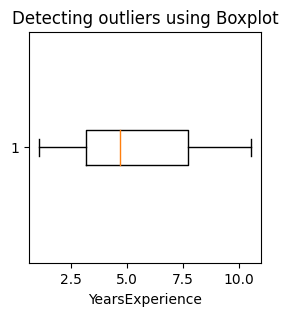

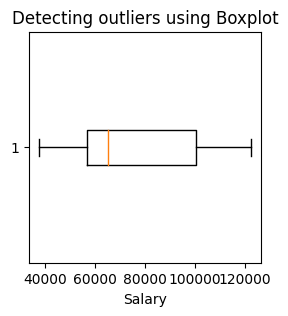

In [60]:
# Checking for any outliers

import matplotlib.pyplot as plt
for i in dict(ds.dtypes):
 if dict(ds.dtypes)[i] == 'int64' or dict(ds.dtypes)[i] ==  'float64':
  plt.figure(figsize =(3,3))
  plt.boxplot(ds[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

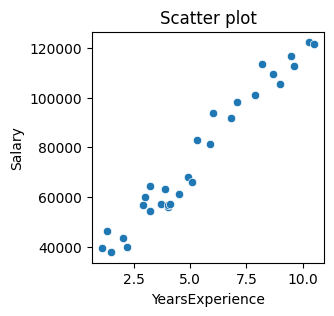

In [115]:
# Data Visualization

import seaborn as sns

plt.figure(figsize =(3,3))
sns.scatterplot(x = ds['YearsExperience'], y= ds['Salary'], data = ds)
plt.title('Scatter plot')
plt.show()

In [67]:
# Data Summary

ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [116]:
# lets assign a variables to the columns

xs = ds[['YearsExperience']]
ys = ds[['Salary']]

In [117]:
xs_train, xs_test, ys_train, ys_test = tts(xs,ys , test_size= 0.2)

In [118]:
xs_train.shape

(24, 1)

In [119]:
xs_test.shape

(6, 1)

In [120]:
from sklearn.linear_model import LinearRegression  # importing the linear regression model
reg2= LinearRegression()   # Assigning the model to a variable reg
reg2.fit(xs_train,ys_train) # training the model

LinearRegression()

In [131]:
# Now our model is ready to test

reg2.predict([[5]]) # gave a random sorting time 5

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[72798.63187414]])

In [132]:
# Checking for the test variables

ys_pred =reg2.predict(xs_test)
ys_pred

array([[62431.906791  ],
       [64316.76589702],
       [55834.8999199 ],
       [63374.33634401],
       [82222.92740427],
       [81280.49785126]])

Text(0.5, 1.0, 'Salary hike Data')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


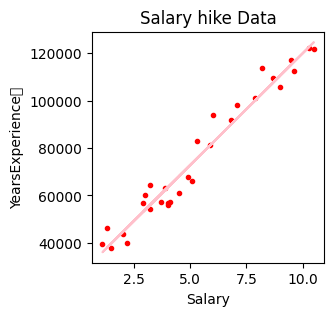

In [137]:
# Lets see the best fit line

plt.figure(figsize =(3,3))
plt.scatter(ds[['YearsExperience']], ds[['Salary']], color = 'red', marker = '.')
plt.plot(xs_train, reg2.predict(xs_train), color = 'pink')
plt.ylabel('YearsExperience	')
plt.xlabel('Salary')
plt.title('Salary hike Data')

In [145]:
# Performance of the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mses = mean_squared_error(ys_train,reg2.predict(xs_train))
msest = mean_squared_error(ys_test,reg2.predict(xs_test))
maes = mean_absolute_error(ys_train, reg2.predict(xs_train))
maest = mean_absolute_error(ys_test, reg2.predict(xs_test))
r2s = r2_score(ys_test,reg2.predict(xs_test))
r2st = r2_score(ys_train,reg2.predict(xs_train))


print("Mean squared Error for train: ", mses)
print("Mean squared Error for test: ", msest)
print('Mean Absolute Error for train: ', maes)
print('Mean Absolute Error for test: ', maest)
print('R - square for test: ', r2s)
print('R - square for train: ', r2st)

Mean squared Error for train:  26441330.448052406
Mean squared Error for test:  50931146.10154297
Mean Absolute Error for train:  4340.236648296233
Mean Absolute Error for test:  5808.145045766641
R - square for test:  0.7258374499133412
R - square for train:  0.9688364212876986
